La méthode du Coude (Elbow Method)

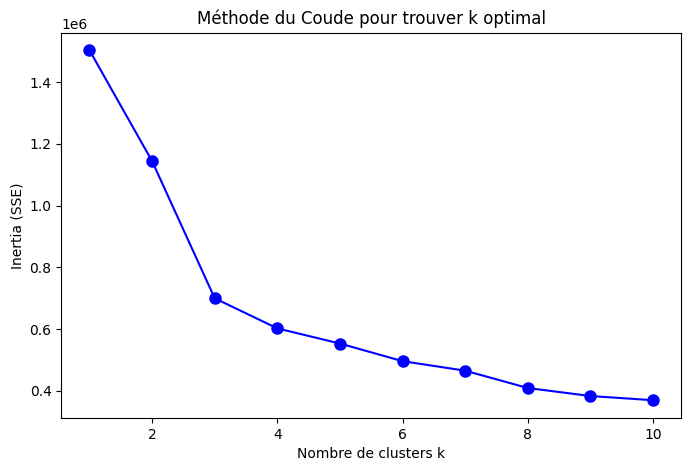

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_unsupervised"
X = pd.read_csv(f"{data_dir}\\X_scaled.csv")

inertia = []
K_range = range(1, 11)  # tester de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertia (SSE)')
plt.title("Méthode du Coude pour trouver k optimal")
plt.show()


Méthode du Coude pour déterminer le nombre optimal de clusters (K)

La figure montre l’évolution de l’inertia (SSE) en fonction du nombre de clusters k.
On observe que l’inertia diminue fortement pour k = 1 → 3 puis la baisse devient moins marquée à partir de k = 3.
Le “coude” de la courbe est donc à k = 3, ce qui suggère que 3 clusters est un choix approprié pour segmenter le dataset.

Cette méthode permet de sélectionner un k optimal qui équilibre la qualité de regroupement et la simplicité du modèle, évitant ainsi le sur-clustering.

✅ K-Means terminé
Labels : [2 1 2 0 1 2 2 2 1 2]
Centroids shape : (3, 24)


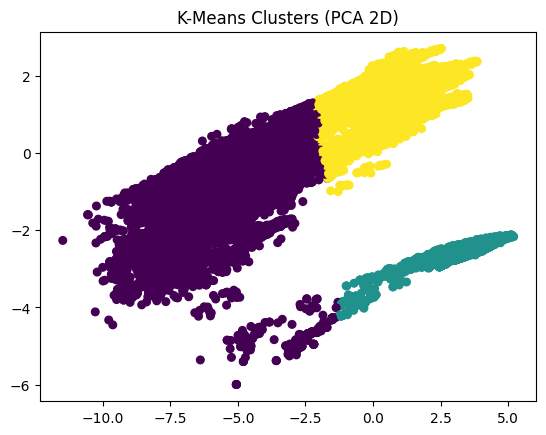

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le dataset
data_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_unsupervised"
X = pd.read_csv(f"{data_dir}\\X_scaled.csv")

# Initialiser KMeans
k = 3  # nombre de clusters (à ajuster selon le dataset)
kmeans = KMeans(n_clusters=k, random_state=42)

# Appliquer le clustering
kmeans.fit(X)

# Labels attribués à chaque observation
labels = kmeans.labels_

# Centroides des clusters
centroids = kmeans.cluster_centers_

print("✅ K-Means terminé")
print(f"Labels : {labels[:10]}")  # Affiche les 10 premiers labels
print(f"Centroids shape : {centroids.shape}")

# Visualisation (si 2 features ou réduire via PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30)
plt.title("K-Means Clusters (PCA 2D)")
plt.show()


✅ Dataset chargé : (62645, 24)
✅ Centroids initialisés : (3, 24)
Convergence atteinte après 9 itérations
✅ K-Means terminé
Centroids finaux :
[[-0.31008959 -0.78734992  0.72225912  1.09722495  1.44259242  1.2487217
   1.28854472 -1.37237992 -1.42845713 -1.46512916 -1.43054769 -0.75323839
  -1.45540306 -1.44490966 -1.35327338  0.0434542   0.67619938  0.89845874
  -0.70866473  0.47072457  0.95219069  0.19062682 -0.22457701  0.41046106]
 [ 0.09360156  0.11906743 -0.17391935 -0.37361554 -0.46309576 -0.40599525
  -0.37384082  0.39974475  0.37327855  0.40085398  0.37641901  0.26311914
   0.40759758  0.42316702  0.37246197  0.65745742  0.31258727  0.15432884
   0.45522647  0.45858315  0.1481221   0.56883542  0.32046953 -0.14547074]
 [ 0.1503252   0.63838494 -0.44558113 -0.44010952 -0.63950544 -0.54244732
  -0.6573664   0.69671369  0.81782026  0.79987245  0.81340227  0.28777314
   0.77420701  0.72856542  0.73401968 -1.47247202 -1.44616587 -1.35658508
  -0.17875849 -1.52830813 -1.40430439 -1.44

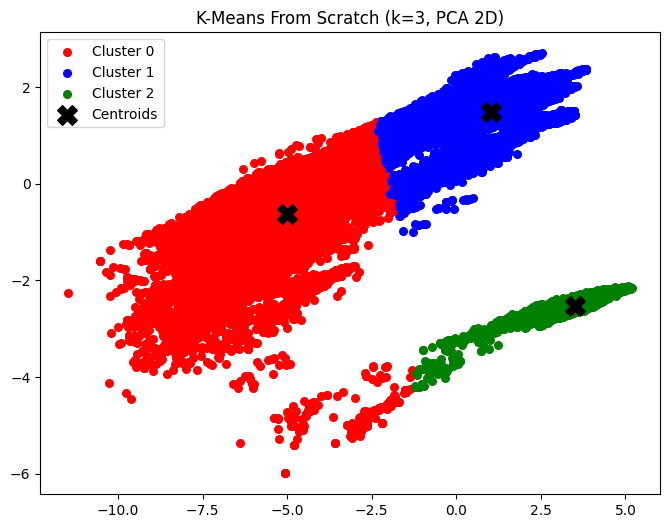

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # pour visualisation 2D

# ===========================
# 1. Charger le dataset normalisé
# ===========================
data_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_unsupervised"
X = pd.read_csv(f"{data_dir}\\X_scaled.csv")
X_array = X.values

print(f"✅ Dataset chargé : {X_array.shape}")

# ===========================
# 2. Paramètres K-Means
# ===========================
k = 3                 # nombre de clusters
max_iters = 100       # itérations max
tol = 1e-4            # tolérance pour convergence

# ===========================
# 3. Initialiser les centroids aléatoirement
# ===========================
np.random.seed(42)
initial_indices = np.random.choice(X_array.shape[0], k, replace=False)
centroids = X_array[initial_indices]

print(f"✅ Centroids initialisés : {centroids.shape}")

# ===========================
# 4. Boucle K-Means
# ===========================
for i in range(max_iters):
    # 4a. Calculer les distances (Euclidiennes)
    distances = np.linalg.norm(X_array[:, np.newaxis] - centroids, axis=2)  # shape (n_samples, k)
    
    # 4b. Assigner chaque point au cluster le plus proche
    labels = np.argmin(distances, axis=1)
    
    # 4c. Calculer les nouveaux centroids
    new_centroids = np.array([X_array[labels==j].mean(axis=0) for j in range(k)])
    
    # 4d. Vérifier convergence
    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f"Convergence atteinte après {i+1} itérations")
        break
    
    centroids = new_centroids

# ===========================
# 5. Résultat final
# ===========================
print("✅ K-Means terminé")
print(f"Centroids finaux :\n{centroids}")
print(f"Labels des 10 premiers points : {labels[:10]}")

# ===========================
# 6. Visualisation PCA 2D
# ===========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

plt.figure(figsize=(8,6))
colors = ['red','blue','green']
for cluster_id in range(k):
    plt.scatter(X_pca[labels==cluster_id,0], X_pca[labels==cluster_id,1], 
                c=colors[cluster_id%len(colors)], label=f'Cluster {cluster_id}', s=30)
plt.scatter(pca.transform(centroids)[:,0], pca.transform(centroids)[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.title("K-Means From Scratch (k=3, PCA 2D)")
plt.legend()
plt.show()


In [2]:

import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = r"C:\Users\DELL\Desktop\project_fire\data\processed_unsupervised"
X = pd.read_csv(f"{data_dir}\\X_scaled.csv")  # Note le double backslash ou le r"..." pour path Windows
X_array = X.values
print(f"Shape of dataset: {X_array.shape}")

# ==========================================
# 3️⃣ Implémentation CLARANS
# ==========================================
def clarans(X, k, numlocal=5, maxneighbor=50, random_state=None):
    np.random.seed(random_state)
    n_samples = X.shape[0]
    best_medoids = None
    best_cost = np.inf

    def total_cost(medoids):
        dist = cdist(X, X[medoids], metric='euclidean')
        return np.sum(np.min(dist, axis=1))
    
    for _ in range(numlocal):
        medoids = np.random.choice(n_samples, k, replace=False)
        neighbor_examined = 0

        while neighbor_examined < maxneighbor:
            m_idx = np.random.choice(k)
            non_medoids = [i for i in range(n_samples) if i not in medoids]
            o_idx = np.random.choice(non_medoids)
            
            new_medoids = medoids.copy()
            new_medoids[m_idx] = o_idx
            cost_new = total_cost(new_medoids)
            cost_current = total_cost(medoids)
            
            if cost_new < cost_current:
                medoids = new_medoids
                neighbor_examined = 0
            else:
                neighbor_examined += 1
        
        cost_final = total_cost(medoids)
        if cost_final < best_cost:
            best_cost = cost_final
            best_medoids = medoids

    distances = cdist(X, X[best_medoids], metric='euclidean')
    labels = np.argmin(distances, axis=1)

    return best_medoids, labels

# ==========================================
# 4️⃣ Appliquer CLARANS
# ==========================================
k = 4
medoids_clarans, labels_clarans = clarans(X_array, k=k, numlocal=5, maxneighbor=50, random_state=42)

print("CLARANS results:")
print(f"Medoids indices: {medoids_clarans}")
for i in range(k):
    print(f"Cluster {i}: {(labels_clarans == i).sum()} points")

# ==========================================
# 5️⃣ CLARANS métriques
# ==========================================
silhouette_c = silhouette_score(X_array, labels_clarans)
db_c = davies_bouldin_score(X_array, labels_clarans)
ch_c = calinski_harabasz_score(X_array, labels_clarans)

print("\nCLARANS métriques :")
print(f"Silhouette Score: {silhouette_c:.4f}")
print(f"Davies-Bouldin Index: {db_c:.4f}")
print(f"Calinski-Harabasz Index: {ch_c:.4f}")

# ==========================================
# 6️⃣ Comparaison avec KMeans (scikit-learn)
# ==========================================
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_array)
centers_kmeans = kmeans.cluster_centers_

print("\nKMeans results (scikit-learn):")
for i in range(k):
    print(f"Cluster {i}: {(labels_kmeans == i).sum()} points")

# ==========================================
# 7️⃣ KMeans métriques
# ==========================================
silhouette_k = silhouette_score(X_array, labels_kmeans)
db_k = davies_bouldin_score(X_array, labels_kmeans)
ch_k = calinski_harabasz_score(X_array, labels_kmeans)

print("\nKMeans métriques :")
print(f"Silhouette Score: {silhouette_k:.4f}")
print(f"Davies-Bouldin Index: {db_k:.4f}")
print(f"Calinski-Harabasz Index: {ch_k:.4f}")

# ==========================================
# 8️⃣ Visualisation comparée
# ==========================================
if X_array.shape[1] > 2:
    X_vis = PCA(n_components=2).fit_transform(X_array)
else:
    X_vis = X_array

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# CLARANS
axes[0].scatter(X_vis[:, 0], X_vis[:, 1], c=labels_clarans, s=30, cmap='viridis', alpha=0.6)
axes[0].scatter(X_vis[medoids_clarans, 0], X_vis[medoids_clarans, 1], c='red', s=200, marker='X', label='Medoids')
axes[0].set_title("CLARANS Clustering")
axes[0].legend()

# KMeans
axes[1].scatter(X_vis[:, 0], X_vis[:, 1], c=labels_kmeans, s=30, cmap='viridis', alpha=0.6)
axes[1].scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[1].set_title("KMeans Clustering (scikit-learn)")
axes[1].legend()

plt.show()


Shape of dataset: (62645, 24)


MemoryError: Unable to allocate 1.91 MiB for an array with shape (62645, 4) and data type float64

In [1]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_unsupervised"
X = pd.read_csv(f"{data_dir}\\X_scaled.csv")
X_array = X.values

print(f"✅ Dataset chargé : {X_array.shape}")

# ==========================================
# 3️⃣ Appliquer DBSCAN
# ==========================================
dbscan = DBSCAN(
    eps=0.5,        # à ajuster selon tes données
    min_samples=10,
    metric="euclidean",
    n_jobs=-1
)

labels = dbscan.fit_predict(X_array)

# ==========================================
# 4️⃣ Analyse des clusters
# ==========================================
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(labels).count(-1)

print("\n📊 RÉSULTATS DBSCAN")
print("=" * 40)
print(f"Nombre de clusters détectés : {n_clusters}")
print(f"Nombre de points bruit (-1) : {n_noise}")

# ==========================================
# 5️⃣ Métriques de validation
# ==========================================
# DBSCAN peut produire 0 ou 1 cluster → vérifier
if n_clusters > 1:
    mask = labels != -1  # exclure le bruit

    silhouette = silhouette_score(X_array[mask], labels[mask])
    db_index = davies_bouldin_score(X_array[mask], labels[mask])
    ch_index = calinski_harabasz_score(X_array[mask], labels[mask])

    print("\n📈 INDICES DE VALIDATION")
    print("=" * 40)
    print(f"Score de Silhouette          : {silhouette:.4f}")
    print(f"Indice de Davies–Bouldin     : {db_index:.4f}")
    print(f"Indice de Calinski–Harabasz  : {ch_index:.2f}")
else:
    print("\n⚠️ Impossible de calculer les métriques : moins de 2 clusters détectés.")


✅ Dataset chargé : (62645, 24)

📊 RÉSULTATS DBSCAN
Nombre de clusters détectés : 303
Nombre de points bruit (-1) : 14593


MemoryError: Unable to allocate 1.00 GiB for an array with shape (2793, 48052) and data type float64

✅ Dataset chargé : (62645, 24)
✅ DBSCAN terminé
Nombre de clusters trouvés : 699
Labels (10 premiers points) : [0 1 2 3 1 0 2 3 1 0]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2104\3673681497.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


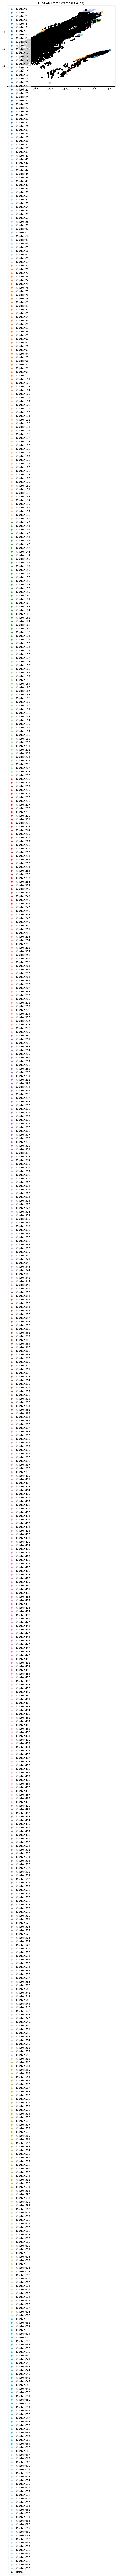

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ===========================
# 1. Charger le dataset
# ===========================
data_dir = "C:\\Users\\DELL\\Desktop\\project_fire\\data\\processed_unsupervised"
X = pd.read_csv(f"{data_dir}\\X_scaled.csv")
X_array = X.values

print(f"✅ Dataset chargé : {X_array.shape}")

# ===========================
# 2. DBSCAN parameters
# ===========================
eps = 0.5        # distance max pour considérer voisin
min_pts = 5      # nombre minimum de voisins pour un point core

# ===========================
# 3. Fonctions utilitaires
# ===========================
def distance(a, b):
    return np.linalg.norm(a - b)

def region_query(point_idx):
    neighbors = []
    for i in range(len(X_array)):
        if distance(X_array[point_idx], X_array[i]) <= eps:
            neighbors.append(i)
    return neighbors

# ===========================
# 4. DBSCAN Algorithm
# ===========================
labels = np.full(shape=len(X_array), fill_value=-1)  # -1 = noise
cluster_id = 0

visited = np.zeros(len(X_array), dtype=bool)

for i in range(len(X_array)):
    if visited[i]:
        continue
    visited[i] = True
    neighbors = region_query(i)
    
    if len(neighbors) < min_pts:
        labels[i] = -1  # bruit
    else:
        # créer un nouveau cluster
        labels[i] = cluster_id
        seeds = neighbors.copy()
        seeds.remove(i)
        
        while seeds:
            current_point = seeds[0]
            if not visited[current_point]:
                visited[current_point] = True
                current_neighbors = region_query(current_point)
                if len(current_neighbors) >= min_pts:
                    for n in current_neighbors:
                        if n not in seeds:
                            seeds.append(n)
            if labels[current_point] == -1:
                labels[current_point] = cluster_id
            elif labels[current_point] == -1:
                labels[current_point] = cluster_id
            seeds = seeds[1:]
        
        cluster_id += 1

print("✅ DBSCAN terminé")
print(f"Nombre de clusters trouvés : {cluster_id}")
print(f"Labels (10 premiers points) : {labels[:10]}")

# ===========================
# 5. Visualisation PCA 2D
# ===========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab20', len(unique_labels))

for k in unique_labels:
    class_member_mask = (labels == k)
    if k == -1:
        # points bruit en noir
        color = 'black'
        label_name = 'Noise'
    else:
        color = colors(k)
        label_name = f'Cluster {k}'
    plt.scatter(X_pca[class_member_mask,0], X_pca[class_member_mask,1],
                c=[color], label=label_name, s=30)

plt.title("DBSCAN From Scratch (PCA 2D)")
plt.legend()
plt.show()
